In [5]:
import yfinance as yf
import os

In [6]:
symbols = ['MMM','ABT','ABBV','ACN','ATVI','AYI','ADBE','AMD','AAP','AES','AET',
           'AMG','AFL','A','APD','AKAM','ALK','ALB','ARE','ALXN','ALGN','ALLE',
           'AGN','ADS','LNT','ALL','GOOGL','GOOG','MO','AMZN','AEE','AAL','AEP',
           'AXP','AIG','AMT','AWK','AMP','ABC','AME','AMGN','APH','APC','ADI','ANDV',
           'ANSS','ANTM','AON','AOS','APA','AIV','AAPL','AMAT','APTV','ADM','ARNC',
           'AJG','AIZ','T','ADSK','ADP','AZO','AVB','AVY','BHGE','BLL','BAC','BK',
           'BAX','BBT','BDX','BRK.B','BBY','BIIB','BLK','HRB','BA','BWA','BXP','BSX',
           'BHF','BMY','AVGO','BF.B','CHRW','CA','COG','CDNS','CPB','COF','CAH','CBOE',
           'KMX','CCL','CAT','CBG','CBS','CELG','CNC','CNP','CTL','CERN','CF','SCHW',
           'CHTR','CHK','CVX','CMG','CB','CHD','CI','XEC','CINF','CTAS','CSCO','C','CFG',
           'CTXS','CLX','CME','CMS','KO','CTSH','CL','CMCSA','CMA','CAG','CXO','COP',
           'ED','STZ','COO','GLW','COST','COTY','CCI','CSRA','CSX','CMI','CVS','DHI',
           'DHR','DRI','DVA','DE','DAL','XRAY','DVN','DLR','DFS','DISCA','DISCK','DISH',
           'DG','DLTR','D','DOV','DWDP','DPS','DTE','DRE','DUK','DXC','ETFC','EMN','ETN',
           'EBAY','ECL','EIX','EW','EA','EMR','ETR','EVHC','EOG','EQT','EFX','EQIX','EQR',
           'ESS','EL','ES','RE','EXC','EXPE','EXPD','ESRX','EXR','XOM','FFIV','FB','FAST',
           'FRT','FDX','FIS','FITB','FE','FISV','FLIR','FLS','FLR','FMC','FL','F','FTV',
           'FBHS','BEN','FCX','GPS','GRMN','IT','GD','GE','GGP','GIS','GM','GPC','GILD',
           'GPN','GS','GT','GWW','HAL','HBI','HOG','HRS','HIG','HAS','HCA','HCP','HP','HSIC',
           'HSY','HES','HPE','HLT','HOLX','HD','HON','HRL','HST','HPQ','HUM','HBAN','HII',
           'IDXX','INFO','ITW','ILMN','IR','INTC','ICE','IBM','INCY','IP','IPG','IFF','INTU',
           'ISRG','IVZ','IQV','IRM','JEC','JBHT','SJM','JNJ','JCI','JPM','JNPR','KSU','K','KEY',
           'KMB','KIM','KMI','KLAC','KSS','KHC','KR','LB','LLL','LH','LRCX','LEG','LEN','LUK',
           'LLY','LNC','LKQ','LMT','L','LOW','LYB','MTB','MAC','M','MRO','MPC','MAR','MMC','MLM',
           'MAS','MA','MAT','MKC','MCD','MCK','MDT','MRK','MET','MTD','MGM','KORS','MCHP','MU',
           'MSFT','MAA','MHK','TAP','MDLZ','MON','MNST','MCO','MS','MOS','MSI','MYL','NDAQ',
           'NOV','NAVI','NTAP','NFLX','NWL','NFX','NEM','NWSA','NWS','NEE','NLSN','NKE','NI',
           'NBL','JWN','NSC','NTRS','NOC','NCLH','NRG','NUE','NVDA','ORLY','OXY','OMC','OKE',
           'ORCL','PCAR','PKG','PH','PDCO','PAYX','PYPL','PNR','PBCT','PEP','PKI','PRGO','PFE',
           'PCG','PM','PSX','PNW','PXD','PNC','RL','PPG','PPL','PX','PCLN','PFG','PG','PGR',
           'PLD','PRU','PEG','PSA','PHM','PVH','QRVO','PWR','QCOM','DGX','RRC','RJF','RTN','O',
           'RHT','REG','REGN','RF','RSG','RMD','RHI','ROK','COL','ROP','ROST','RCL','CRM','SBAC',
           'SCG','SLB','SNI','STX','SEE','SRE','SHW','SIG','SPG','SWKS','SLG','SNA','SO','LUV',
           'SPGI','SWK','SBUX','STT','SRCL','SYK','STI','SYMC','SYF','SNPS','SYY','TROW','TPR',
           'TGT','TEL','FTI','TXN','TXT','TMO','TIF','TWX','TJX','TMK','TSS','TSCO','TDG','TRV',
           'TRIP','FOXA','FOX','TSN','UDR','ULTA','USB','UAA','UA','UNP','UAL','UNH','UPS','URI',
           'UTX','UHS','UNM','VFC','VLO','VAR','VTR','VRSN','VRSK','VZ','VRTX','VIAB','V','VNO',
           'VMC','WMT','WBA','DIS','WM','WAT','WEC','WFC','HCN','WDC','WU','WRK','WY','WHR','WMB',
           'WLTW','WYN','WYNN','XEL','XRX','XLNX','XL','XYL','YUM','ZBH','ZION','ZTS']

In [7]:
symbols.append('SPY')

In [8]:
if not os.path.exists('data'):
    os.mkdir('data')

In [9]:
'''
Next, I create a folder called Data, which is where we will store our downloaded data.
'''

'''
Next, we have a loop that looks at all the symbols and symbols list one by one.
'''
for symbol in symbols:
    '''
    Inside this loop, we check whether or not a CSFI file already exists for our symbol in the data folder.
    '''
    if not os.path.exists(f"data/{symbol}.csv"):
        '''
        If it doesn't, then we proceed. Next, we call the function we have to download to download stock data for the current symbol of used
        '''
        data = yf.download(symbol, start="2010-01-01", end="2018-12-31")
        '''
        So when we get back our data frame, we want to check it size.
        If the size is greater than zero, then we save the data frame in the second loop.
        '''
        if data.size > 0:
            data.to_csv(f"data/{symbol}.csv")
        else:
            print("Not saving...")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [12]:
'''
Delete files which have <10 lines
'''
for symbol in symbols:
    if  os.path.exists(f"data/{symbol}.csv"):
        s = open(f"data/{symbol}.csv").readlines()
        if len(s) < 10:
            os.system(f"rm data/{symbol}.csv")

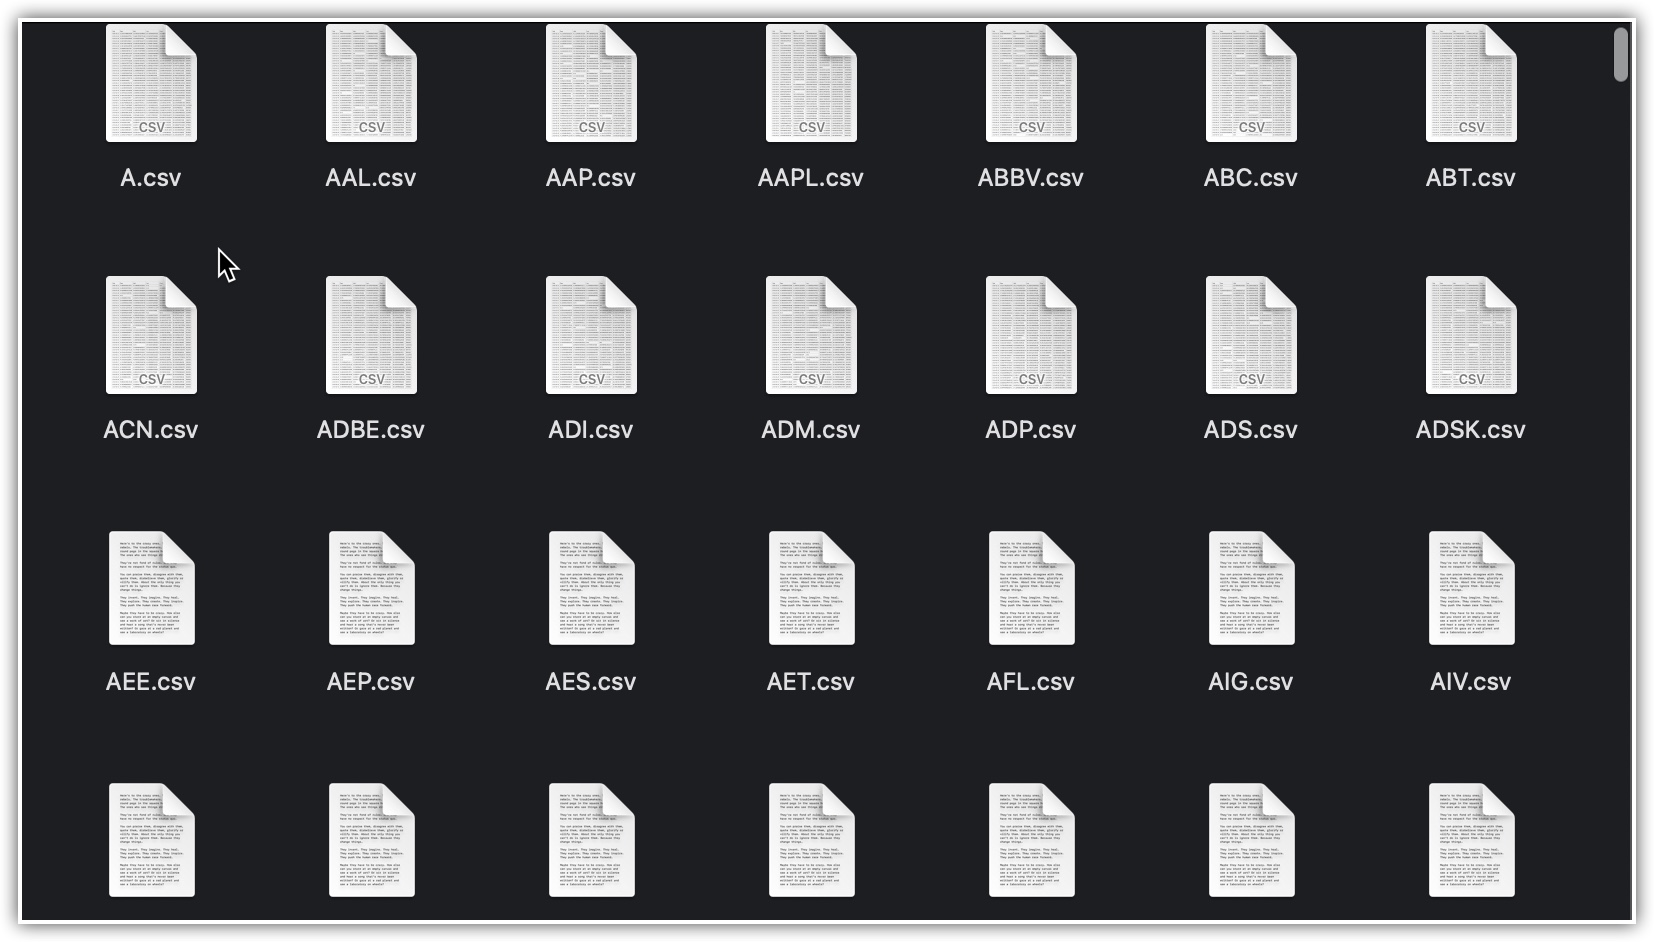

In [13]:
#Downlod the below Files
from IPython.display import Image
Image(filename='/Users/subhasish/GIT/Interstellar/SB-AI-DEV/ML/SB/TimeSeries/Lazy Programmers/Image/f1.jpg')

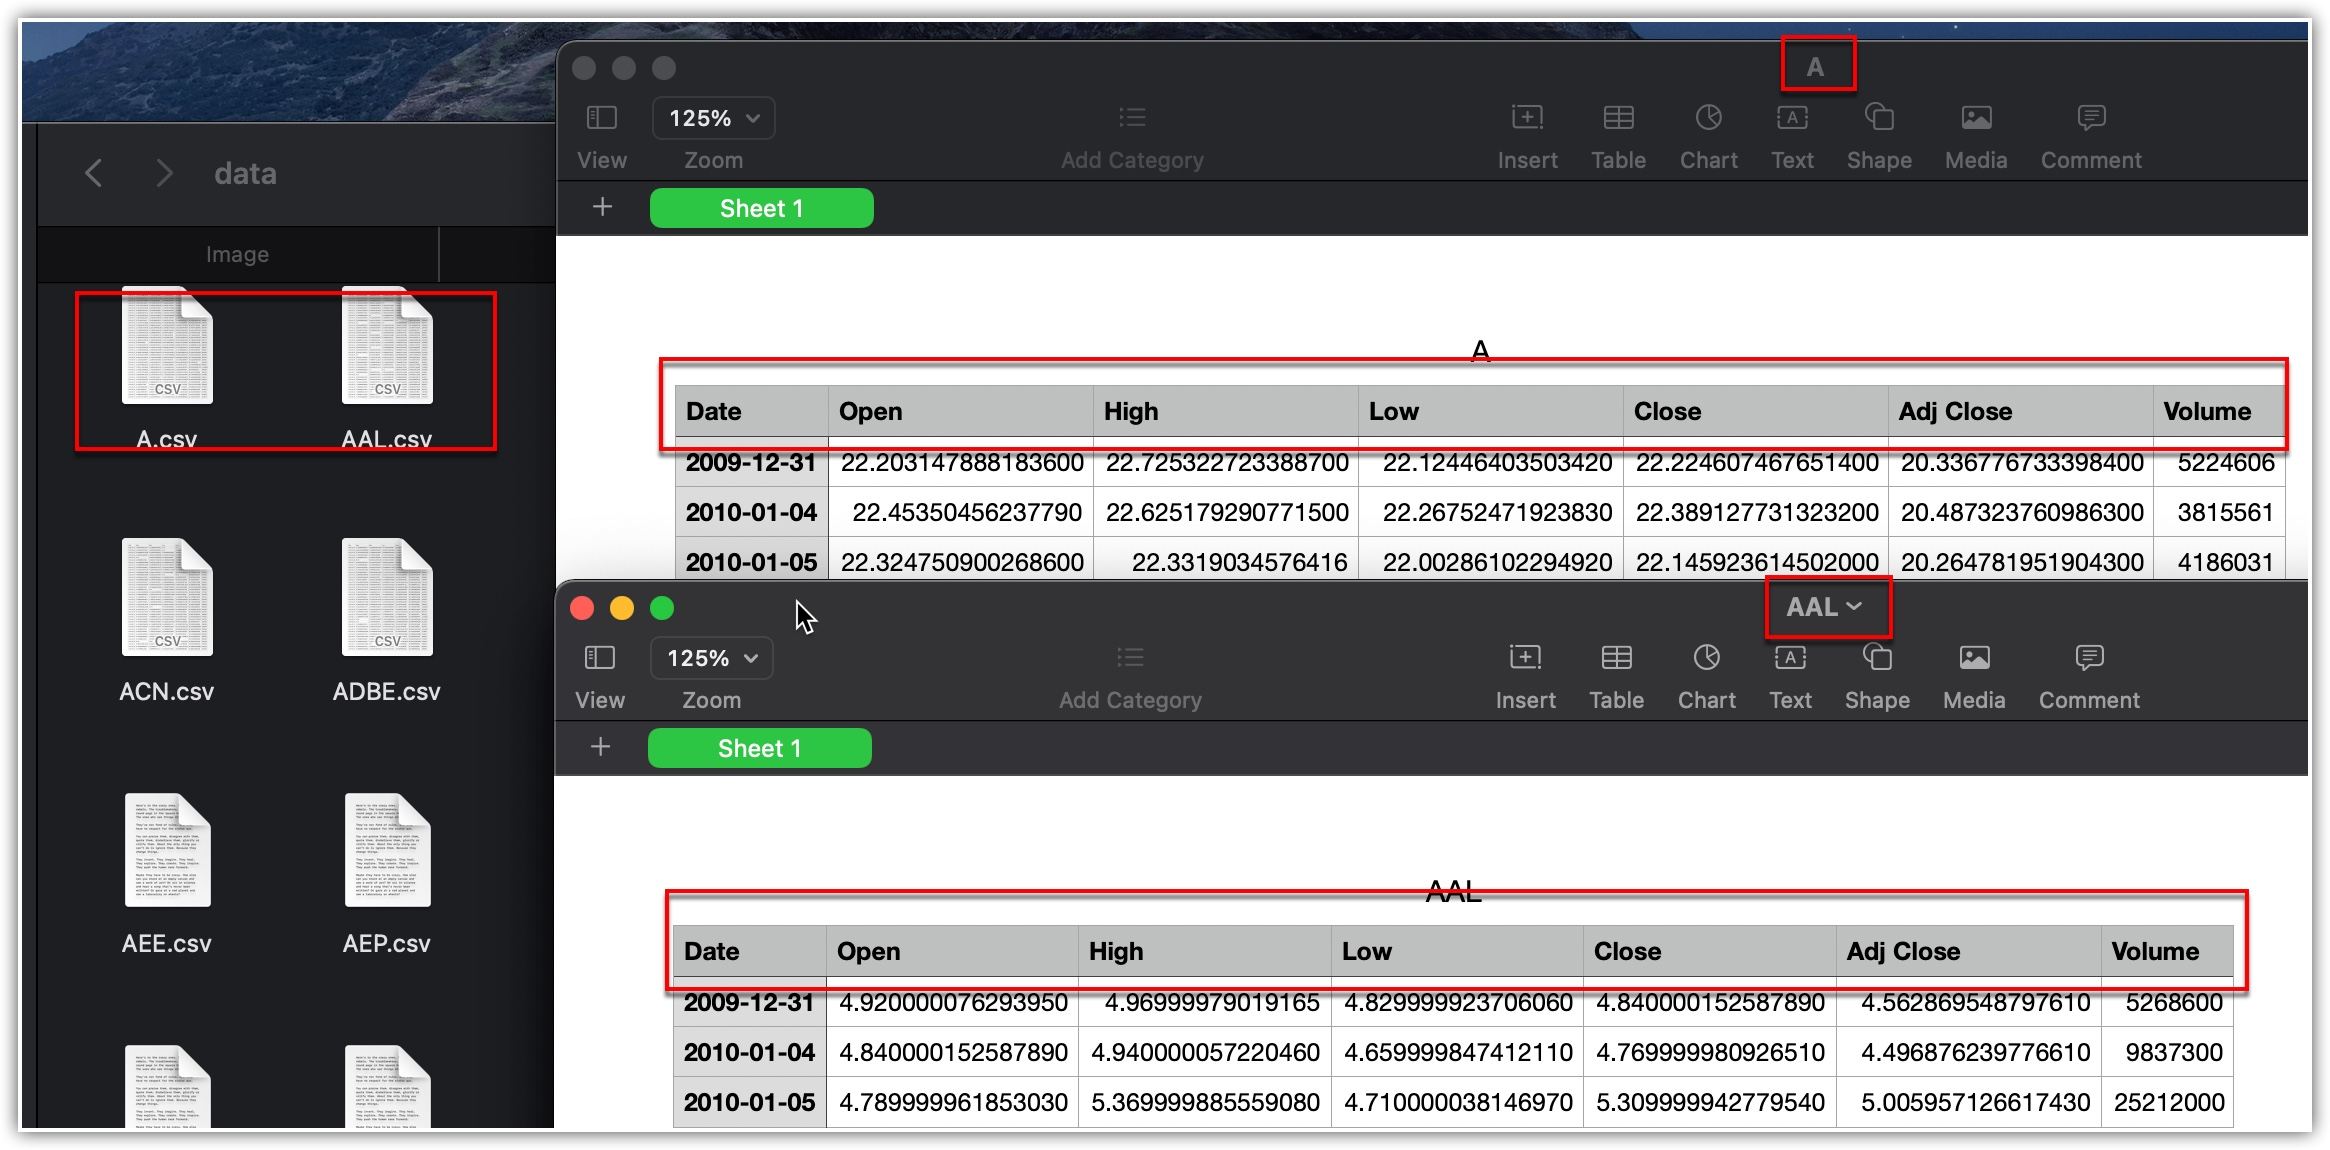

In [14]:
'''
You might wonder why did I previously save each data frame in a separate CSV rather than just combining
them all into the same CSV?
Well, the reason is, as you'll see later, they all have the exact same column names and dates.
'''
from IPython.display import Image
Image(filename='/Users/subhasish/GIT/Interstellar/SB-AI-DEV/ML/SB/TimeSeries/Lazy Programmers/Image/2021-09-13_18-13-06.jpg')

In [16]:
'''
What we would like to do before combining the data is to have a name column that tells us which stock
that row of data refers to, and that's what this script does.
'''

import pandas as pd
from glob import glob

In [27]:
'''
Next we get all the file path for all the CSV's in the data folder.
'''
files = glob('data/*.csv')
'''
Next, I instantiate a variable called full_df to none, and this is the variable that will store our
data frame as we accumulate data from each of the CSV.
'''
full_df = None
'''
Next, we enter a loop to loop through all the CSV.
Inside this loop, we load in the current CSV by calling pd.read_csv(f).
'''

for f in files:
    if not os.path.exists("sp500full.csv"):
        print(f)
        df = pd.read_csv(f)
        #get the symbol name from CSV file name and set and Dataframe name column
        symbol = f.split('/')[1].split('.')[0]
        '''
        Next, we create a new column called Name, and we assign it the value symbol, which we just obtained.
        This will assign the same value to every row in the current data frame.
        '''
        df['Name'] = symbol
        '''
        Next, we check whether full_df is none if it is, then we can just assign full deserve to be the current
        data frame.
        Otherwise we call the append function passing in the current data frame D.F. and assign the result to
        '''
        if full_df is None:
            full_df = df
        else:
            full_df = full_df.append(df, ignore_index=True)
#we save the dataframe
if not os.path.exists("sp500full.csv"):
    full_df.to_csv('sp500full.csv', index=False)

data/CSCO.csv
data/UAL.csv
data/TROW.csv
data/ISRG.csv
data/PRGO.csv
data/TPR.csv
data/DVN.csv
data/MRO.csv
data/BA.csv
data/VRTX.csv
data/GILD.csv
data/NLSN.csv
data/EQIX.csv
data/MDT.csv
data/V.csv
data/QRVO.csv
data/A.csv
data/MO.csv
data/SWKS.csv
data/MCHP.csv
data/CDNS.csv
data/WLTW.csv
data/CHTR.csv
data/EIX.csv
data/BBY.csv
data/WBA.csv
data/HCA.csv
data/AJG.csv
data/DTE.csv
data/C.csv
data/T.csv
data/CF.csv
data/DISH.csv
data/MGM.csv
data/HUM.csv
data/CBOE.csv
data/CFG.csv
data/WU.csv
data/APH.csv
data/SYY.csv
data/MSI.csv
data/FCX.csv
data/ADM.csv
data/LH.csv
data/PKI.csv
data/LNT.csv
data/BAC.csv
data/LNC.csv
data/PSX.csv
data/GPN.csv
data/SRCL.csv
data/PPG.csv
data/IRM.csv
data/IQV.csv
data/ESS.csv
data/NOV.csv
data/NAVI.csv
data/HAL.csv
data/STZ.csv
data/FLS.csv
data/DXC.csv
data/ADI.csv
data/F.csv
data/HOG.csv
data/ADBE.csv
data/TDG.csv
data/ULTA.csv
data/ARE.csv
data/SYK.csv
data/CB.csv
data/TSN.csv
data/FLR.csv
data/PEP.csv
data/PEG.csv
data/LLY.csv
data/COST.csv
data/RE

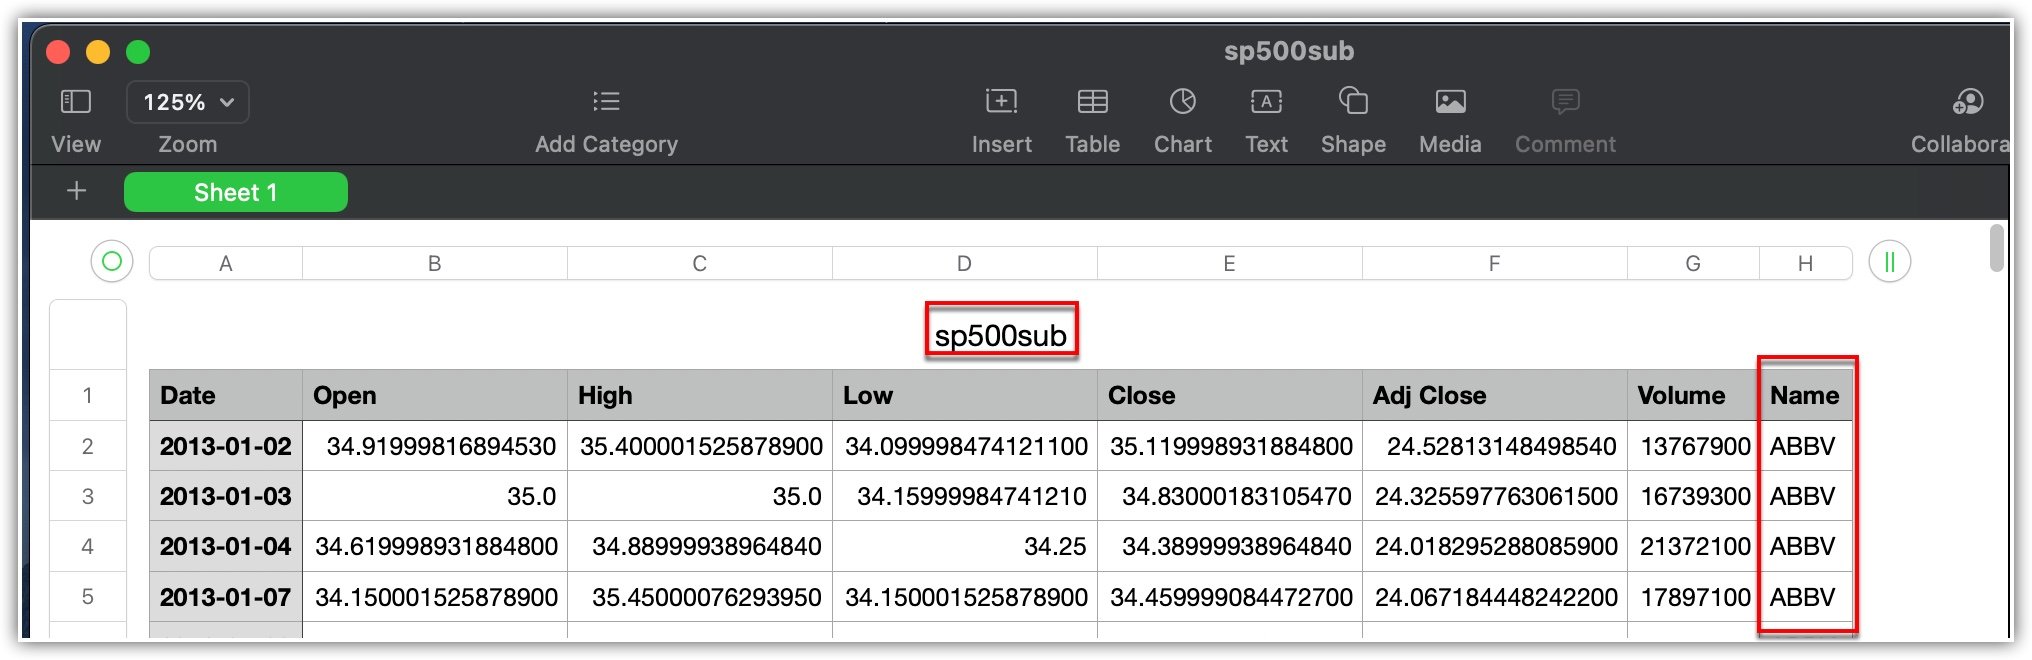

In [21]:
from IPython.display import Image
Image(filename='/Users/subhasish/GIT/Interstellar/SB-AI-DEV/ML/SB/TimeSeries/Lazy Programmers/Image/2021-09-13_18-30-52.jpg')

In [24]:
import random
'''
Next, we have a set called Small Symbol's, which consists of a few stocks that I'll be using in this
course, along with a few others from different industries.
'''
small_symbols = {'MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES',
                 'AFL', 'AKAM', 'IBM', 'GOOG', 'SBUX', 'AAPL', 'SPY'}

'''
So the point of this is to choose a few stocks from other industries that are hopefully uncorrelated
So anyway, since I do want a few more stocks to work with, with the help of the random module, I
sample one hundred more stocks from our symbol's list.
'''
sample = random.sample(symbols, 100)

In [25]:
'''
So the next step is to convert our sample into a set and then do a union of our two sets.

As you know, sets can only have unique items, so any duplicates are now gone.
'''
small_symbols = small_symbols | set(sample)

In [26]:
full_df = None
for symbol in small_symbols:
    f = f"data/{symbol}.csv"
    if os.path.exists(f):
        df = pd.read_csv(f)
        df['Name'] = symbol
        if full_df is None:
            full_df = df
        else:
            full_df = full_df.append(df, ignore_index=True)

full_df.to_csv('sp500sub.csv', index=False)

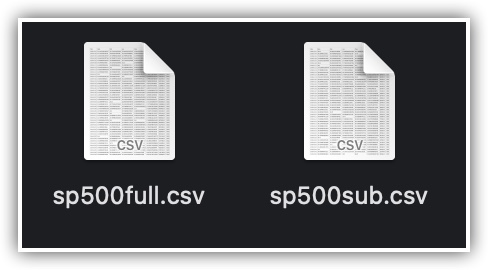

In [28]:
# At the end we get two file which we will work on
from IPython.display import Image
Image(filename='/Users/subhasish/GIT/Interstellar/SB-AI-DEV/ML/SB/TimeSeries/Lazy Programmers/Image/2021-09-13_18-42-10.jpg')